In [1]:
# widen jupyter notebook window
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: base


In [2]:
import sys
import numpy as np
import pandas as pd
import glob

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_to_basic_neural_processing_modules = '/Users/josh/Documents/github_repos'
path_to_GCAMP_ROI = '/Users/josh/Documents/github_repos'
sys.path.append(path_to_basic_neural_processing_modules)
sys.path.append(path_to_GCAMP_ROI)
sys.path.append(path_to_GCAMP_ROI+'/GCaMP_ROI_classifier/new_stuff')
sys.path.append(path_to_GCAMP_ROI+'/GCaMP_ROI_classifier/End_User')
sys.path.append(path_to_GCAMP_ROI+'/GCaMP_ROI_classifier/End_User/simclr-models')

from basic_neural_processing_modules import classification

In [4]:
ally1 = np.load('./Ally/ally_final_round1.npy')
ally2 = np.load('./Ally/ally_final_round2.npy')
ally3 = np.load('./Ally/ally_3843_finalround3.npy')

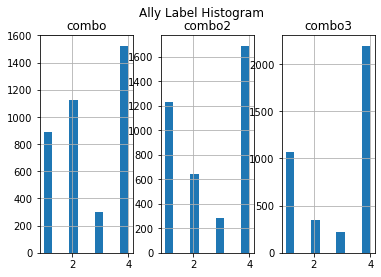

In [5]:
dfa = pd.DataFrame([ally1, ally2, ally3]).T.rename({0:'combo', 1:'combo2', 2:'combo3'}, axis=1)
fig, ax = plt.subplots(1,3)
dfa.hist(ax=ax)
plt.suptitle('Ally Label Histogram');

In [62]:
def gen_cm_heatmap(cm, title_info):
    # plt.imshow(cm, cmap='gray')
    # plt.colorbar()
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, vmax=1., cmap=plt.get_cmap('gray'))
    plt.title(f'Confusion Matrix — {title_info}')
    plt.xlabel('First Round Label')
    plt.ylabel('Second Round Label')

In [7]:
y_hat_col = 'combo2'
y_true_col = 'combo3'

[[0.94785847 0.41477273 0.01351351 0.0273224 ]
 [0.03817505 0.48579545 0.02252252 0.19444444]
 [0.         0.         0.90540541 0.03734062]
 [0.01396648 0.09943182 0.05855856 0.74089253]]


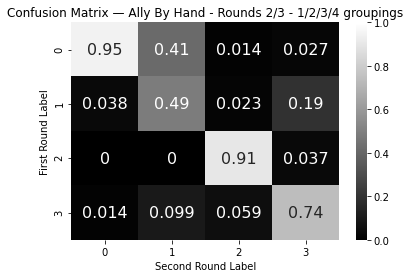

In [8]:
# dfa = pd.DataFrame([ally1, ally2]).T.rename({0:'combo', 1:'combo2'}, axis=1)
dfa = pd.DataFrame([ally1, ally2, ally3]).T.rename({0:'combo', 1:'combo2', 2:'combo3'}, axis=1)
dfa = dfa.astype(int) - 1
cm = classification.confusion_matrix(dfa[y_hat_col], dfa[y_true_col])
# cm = confusion_matrix(dfa['combo3'], dfa['combo2'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Ally By Hand - Rounds 2/3 - 1/2/3/4 groupings')

In [9]:
np.save('./Ally/ally_all_rounds.npy', dfa.values)

[[0.96493689 0.20471464]
 [0.03506311 0.79528536]]


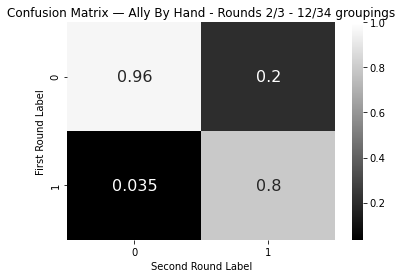

In [10]:
dfa = pd.DataFrame([ally1, ally2, ally3]).T.rename({0:'combo', 1:'combo2', 2:'combo3'}, axis=1)
dfa = dfa.astype(int) - 1
dfa = dfa//2
cm = classification.confusion_matrix(dfa[y_hat_col], dfa[y_true_col])
# cm = confusion_matrix(dfa['combo3'], dfa['combo2'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Ally By Hand - Rounds 2/3 - 12/34 groupings')

[[0.96493689 0.03603604 0.22176685]
 [0.         0.90540541 0.03734062]
 [0.03506311 0.05855856 0.74089253]]


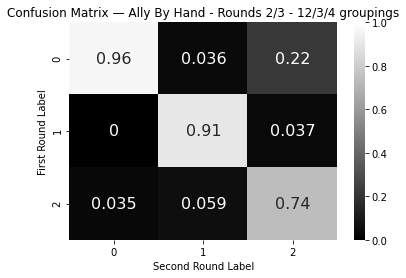

In [11]:
dfa = pd.DataFrame([ally1, ally2, ally3]).T.rename({0:'combo', 1:'combo2', 2:'combo3'}, axis=1)
dfa = dfa.replace(1.0, 2.0) - 1
dfa = dfa.astype(int) - 1
cm = classification.confusion_matrix(dfa[y_hat_col], dfa[y_true_col])
# cm = classification.confusion_matrix(dfa['combo2'], dfa['combo3'])
# cm = confusion_matrix(dfa['combo3'], dfa['combo2'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Ally By Hand - Rounds 2/3 - 12/3/4 groupings')

[[0.94785847 0.07545126]
 [0.05214153 0.92454874]]


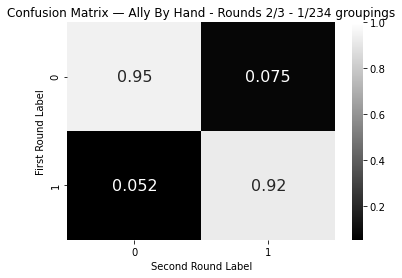

In [12]:
dfa = pd.DataFrame([ally1, ally2, ally3]).T.rename({0:'combo', 1:'combo2', 2:'combo3'}, axis=1)
dfa = dfa.replace(3.0, 2.0)
dfa = dfa.replace(4.0, 2.0)
dfa = dfa.astype(int) - 1
cm = classification.confusion_matrix(dfa[y_hat_col], dfa[y_true_col])
# cm = classification.confusion_matrix(dfa['combo2'], dfa['combo3'])
# cm = confusion_matrix(dfa['combo3'], dfa['combo2'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Ally By Hand - Rounds 2/3 - 1/234 groupings')

In [64]:
priya_lst = (glob.glob('./Priya/*'))

In [65]:
dat = []
datv2 = []

for p_f in priya_lst:
#     np.load
#     for p_f2 in priya_lst:
#         if p_f == p_f2:
#             continue
#         print(np.sum(np.isnan(np.load(p_f)) == np.isnan(np.load(p_f2))))
    if 'v2' in p_f:
        datv2.append(np.load(p_f))
    else:
        dat.append(np.load(p_f))

In [66]:
df = pd.DataFrame(dat).T
df2 = pd.DataFrame(datv2).T

df['combo'] = df[0]
for col in df.columns[1:]:
    df['combo'] = df['combo'].combine_first(df[col])

df2['combo'] = df2[0]
for col in df2.columns[1:]:
    df2['combo'] = df2['combo'].combine_first(df2[col]).replace(42, 2)

full_df = df[['combo']].copy()
full_df['combo2'] = df2['combo']
# full_df = full_df.dropna().copy()
full_df = full_df.astype(float)

In [67]:
full_df[full_df.isna()['combo']]

,combo,combo2


In [68]:
cm = confusion_matrix(full_df['combo2'], full_df['combo'])
cm = cm/cm.sum(axis=1, keepdims=True)
cm = cm.T

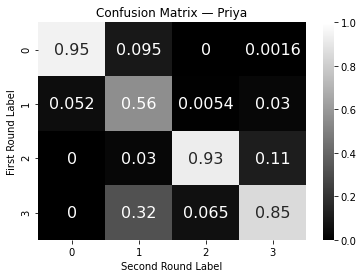

In [69]:
# plt.imshow(cm, cmap='gray')
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, vmax=1., cmap=plt.get_cmap('gray'))
# plt.colorbar()
plt.title('Confusion Matrix — Priya')
plt.xlabel('Second Round Label')
plt.ylabel('First Round Label');

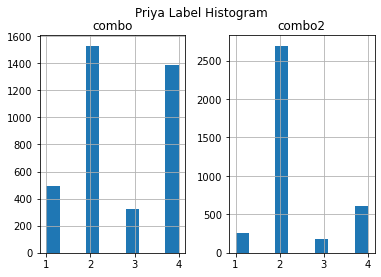

In [70]:
fig, ax = plt.subplots(1,2)
full_df.hist(ax=ax)
plt.suptitle('Priya Label Histogram');

In [71]:
np.save('./Priya/priya_all_rounds.npy', full_df.values)

[[4.81854839e-01 8.50228908e-03 0.00000000e+00 0.00000000e+00]
 [5.16129032e-01 9.79071288e-01 2.53869969e-01 6.17266187e-01]
 [0.00000000e+00 6.54022237e-04 5.29411765e-01 8.63309353e-03]
 [2.01612903e-03 1.17724003e-02 2.16718266e-01 3.74100719e-01]]


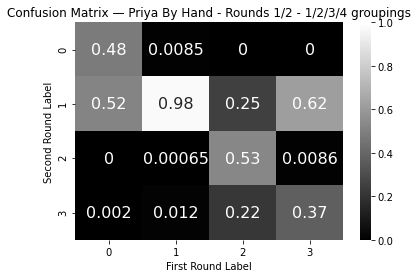

In [72]:
# dfa = pd.DataFrame([ally1, ally2]).T.rename({0:'combo', 1:'combo2'}, axis=1)
dfa = full_df.copy().astype(int) - 1
cm = classification.confusion_matrix(dfa['combo2'].values, dfa['combo'].values)
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - 1/2/3/4 groupings')

[[0.68081494 0.02522068]
 [0.31918506 0.97477932]]


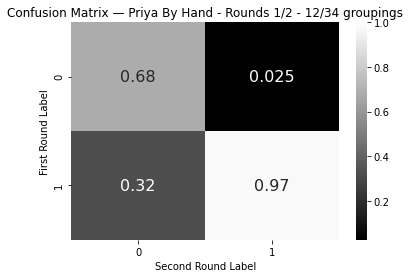

In [22]:
dfa = full_df.copy().astype(int)
dfa = (dfa-1)//2
cm = classification.confusion_matrix(dfa['combo'].values, dfa['combo2'].values)
# cm = confusion_matrix(dfa['combo2'], dfa['combo'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - 12/34 groupings')

[[0.68081494 0.00543478 0.03119869]
 [0.0278438  0.92934783 0.11494253]
 [0.29134126 0.06521739 0.85385878]]


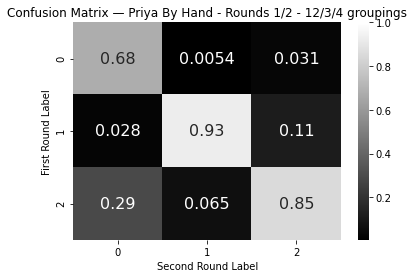

In [23]:
dfa = full_df.copy().astype(int)
dfa = dfa.replace(1.0, 2.0) - 1
dfa -= 1
cm = classification.confusion_matrix(dfa['combo'].values, dfa['combo2'].values)
# cm = confusion_matrix(dfa['combo2'], dfa['combo'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - 12/3/4 groupings')

[[0.9484127  0.07372347]
 [0.0515873  0.92627653]]


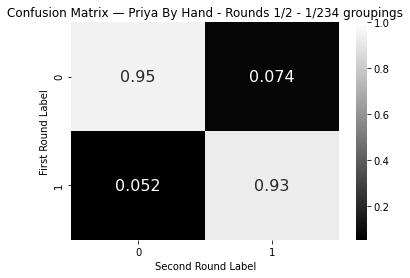

In [52]:
dfa = full_df.copy().astype(int)
dfa = dfa.replace(3, 2)
dfa = dfa.replace(4, 2)
dfa -= 1

cm = classification.confusion_matrix(dfa['combo'].values, dfa['combo2'].values)
# cm = confusion_matrix(dfa['combo2'], dfa['combo'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - 1/234 groupings')

In [73]:
dfa = full_df.copy().astype(int) - 1
tmpa = np.concatenate([dfa['combo'].values, dfa['combo2'].values])
tmpb = np.concatenate([dfa['combo2'].values, dfa['combo'].values])

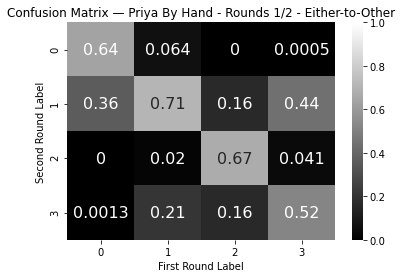

In [74]:
cm = classification.confusion_matrix(tmpa, tmpb)
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - Either-to-Other')

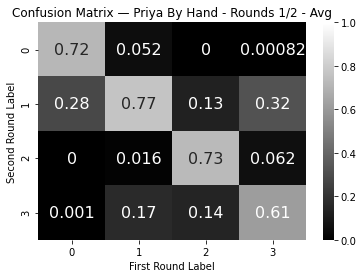

In [76]:
cm = (classification.confusion_matrix(dfa['combo'].values, dfa['combo2'].values) + classification.confusion_matrix(dfa['combo2'].values, dfa['combo'].values)) / 2
gen_cm_heatmap(cm, 'Priya By Hand - Rounds 1/2 - Avg')

# Rich

In [18]:
rich1 = np.load('./Rich/labels_round2_sesh1.npy')
rich2 = np.load('./Rich/labels_round2_sesh2.npy')

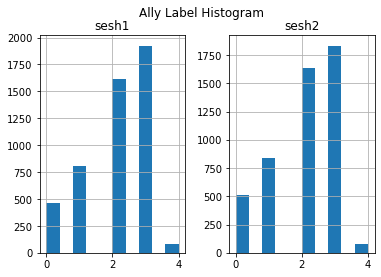

In [19]:
dfa = pd.DataFrame([rich1, rich2]).T.rename({0:'sesh1', 1:'sesh2'}, axis=1)
fig, ax = plt.subplots(1,2)
dfa.hist(ax=ax)
plt.suptitle('Ally Label Histogram');

In [20]:
np.unique(dfa)

array([0., 1., 2., 3., 4.])

In [60]:
def gen_cm_heatmap(cm, title_info):
    # plt.imshow(cm, cmap='gray')
    # plt.colorbar()
    fig, axs = plt.subplots(1,1,figsize=(10,7))
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, vmax=1., cmap=plt.get_cmap('gray'), ax=axs)
    plt.title(f'Confusion Matrix — {title_info}')
    plt.xlabel('First Round Label')
    plt.ylabel('Second Round Label')
    return fig, axs

In [61]:
y_hat_col = 'sesh1'
y_true_col = 'sesh2'

[[0.83139535 0.0430622  0.         0.         0.        ]
 [0.16860465 0.78588517 0.0403423  0.         0.        ]
 [0.         0.17105263 0.86185819 0.03055101 0.09090909]
 [0.         0.         0.08924205 0.96726678 0.06493506]
 [0.         0.         0.00855746 0.00218221 0.84415584]]


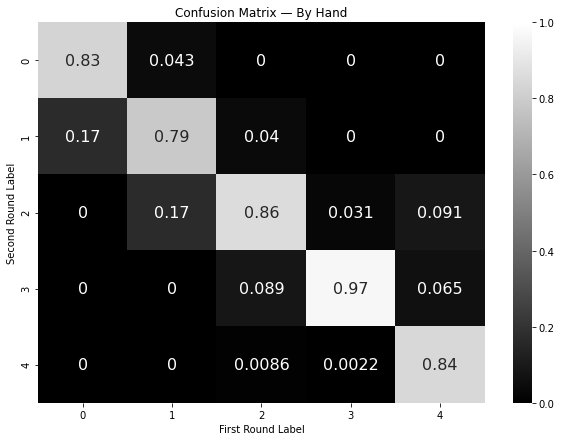

In [72]:
# dfa = pd.DataFrame([ally1, ally2]).T.rename({0:'sesh1', 1:'sesh2'}, axis=1)
dfa = pd.DataFrame([rich1, rich2]).T.rename({0:'sesh1', 1:'sesh2'}, axis=1)
dfa = dfa.astype(int)
cm = classification.confusion_matrix(dfa[y_hat_col], dfa[y_true_col])
# cm = confusion_matrix(dfa['combo3'], dfa['combo2'])
# cm = cm/cm.sum(axis=1, keepdims=True)
# cm = cm.T
print(cm)
fig, axs = gen_cm_heatmap(cm, 'By Hand')

In [73]:
fig.savefig('./Rich-By-Hand.png')
fig.savefig('./Rich-By-Hand.svg')

[[0.89423077 0.01861252]
 [0.10576923 0.98138748]]


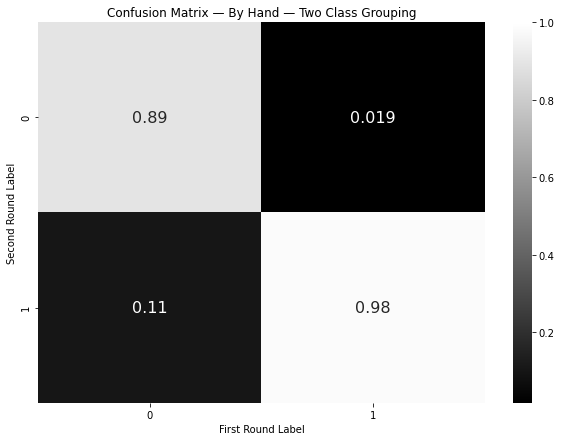

In [70]:
lumped = pd.DataFrame([rich1, rich2]).T.rename({0:'sesh1', 1:'sesh2'}, axis=1)
lumped = (lumped > 1)*1
cm = classification.confusion_matrix(lumped[y_hat_col], lumped[y_true_col])
print(cm)
fig, axs = gen_cm_heatmap(cm, 'By Hand — Two Class Grouping')

In [71]:
fig.savefig('./Rich-Grouped-By-Hand.png')
fig.savefig('./Rich-Grouped-By-Hand.svg')